
<font size="6" color="Green" align="center"><b>LEVEL 2</b></font><br>

<font size="5" color="Darkblue" align="center"><b>Project2:
Wine Quality Prediction</b></font><br>

<font size="4" color="purple" align="center"><b>Introduction</b></font><br>

<p align="justify">
This Wine Quality Prediction project focuses on forecasting the quality of wine based on its chemical characteristics. By leveraging machine learning techniques, the goal is to predict wine quality from features such as density, acidity, and other chemical properties. This project applies machine learning to viticulture, providing insights into how these features impact wine quality and aiding in better decision-making for wine production and quality assessment.
</p>

<font size="4" color="purple" align="center"><b>Objective</b></font><br>

<p align="justify">
The primary objective of this project is to predict wine quality using a dataset of chemical attributes. We aim to develop and compare the performance of different machine learning classifiers, including Random Forest, Support Vector Classifier (SVC), and Gradient Boosting, to determine which model provides the most accurate predictions. This will enhance the understanding of how various chemical qualities influence wine quality and improve predictive accuracy.
</p>

<font size="4" color="purple" align="center"><b>Challenges</b></font><br>

<p align="justify">
The wine quality prediction task presents several challenges:
</p>
<ul>
<li><b>Feature Selection:</b> Identifying which chemical attributes are most influential in predicting wine quality.</li>
<li><b>Model Accuracy:</b> Ensuring that the chosen models are tuned to provide accurate predictions across different wine qualities.</li>
<li><b>Model Comparison:</b> Comparing the performance of various classifiers to select the best model for wine quality prediction.</li>
<li><b>Data Visualization:</b> Effectively visualizing the relationships between chemical attributes and wine quality to gain actionable insights.</li>
</ul>

<font size="4" color="purple" align="center"><b>Wine Quality Prediction System</b></font><br>

<p align="justify">
In this project, we will use a dataset containing chemical attributes of wine to build a predictive model for wine quality. The system will:
</p>
<ul>
<li>Preprocess the data, including handling missing values and feature scaling.</li>
<li>Apply machine learning models such as Random Forest, Support Vector Classifier (SVC), and Gradient Boosting to predict wine quality.</li>
<li>Evaluate and compare the performance of these classifiers.</li>
<li>Visualize the results to understand how different features affect wine quality.</li>
</ul>
<p align="justify">
The outcomes of this project will provide valuable insights into how machine learning can be utilized to predict wine quality based on its chemical characteristics and will help in understanding the factors influencing wine quality.
</p>

<font size="4" color="purple" align="center"><b>About the Dataset</b></font><br>

<p align="justify">
The dataset used in this project is sourced from a publicly available wine quality dataset on Kaggle. It includes chemical attributes such as `density`, `acidity`, and others, along with a target variable representing wine quality. This dataset provides an excellent opportunity to explore machine learning techniques and gain insights into the factors that determine wine quality. Dataset: (<a href="https://www.kaggle.com/datasets/yasserh/wine-quality-dataset">link</a>).
</p>

<p align="justify">
This dataset will help in understanding:
</p>
<ul>
<li>The significance of various chemical attributes in predicting wine quality.</li>
<li>The application of different machine learning models to a real-world dataset.</li>
<li>The development of a robust and accurate wine quality prediction system.</li>
</ul>


<font size="4" color="green" align="center"><b>Importing Necessary Libraries</b></font><b></b>

In [1]:
# pip install pandas numpy scikit-learn xgboost imbalanced-learn matplotlib seaborn
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from imblearn.over_sampling import SMOTE

<font size="4" color="darkblue" align="center"><b>1. Data Collection</b></font></b>

1.1 Load the Dataset

In [2]:
# Read CSV file into a DataFrame
df = pd.read_csv("WineQT.csv")

<font size="3" color="black" align="center"><b>1.1 Explore the Dataset</b></font></b>

In [3]:
df.head() # Show first 5 records of data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [4]:
df.tail() # Last five rows of the dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

In [5]:
# Show the dimensions of the DataFrame
df.shape

(1143, 13)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [7]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [9]:
# Check for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


<font size="3" color="purple" align="center"><b>1. EDA - Data Distribution</b></font><br>

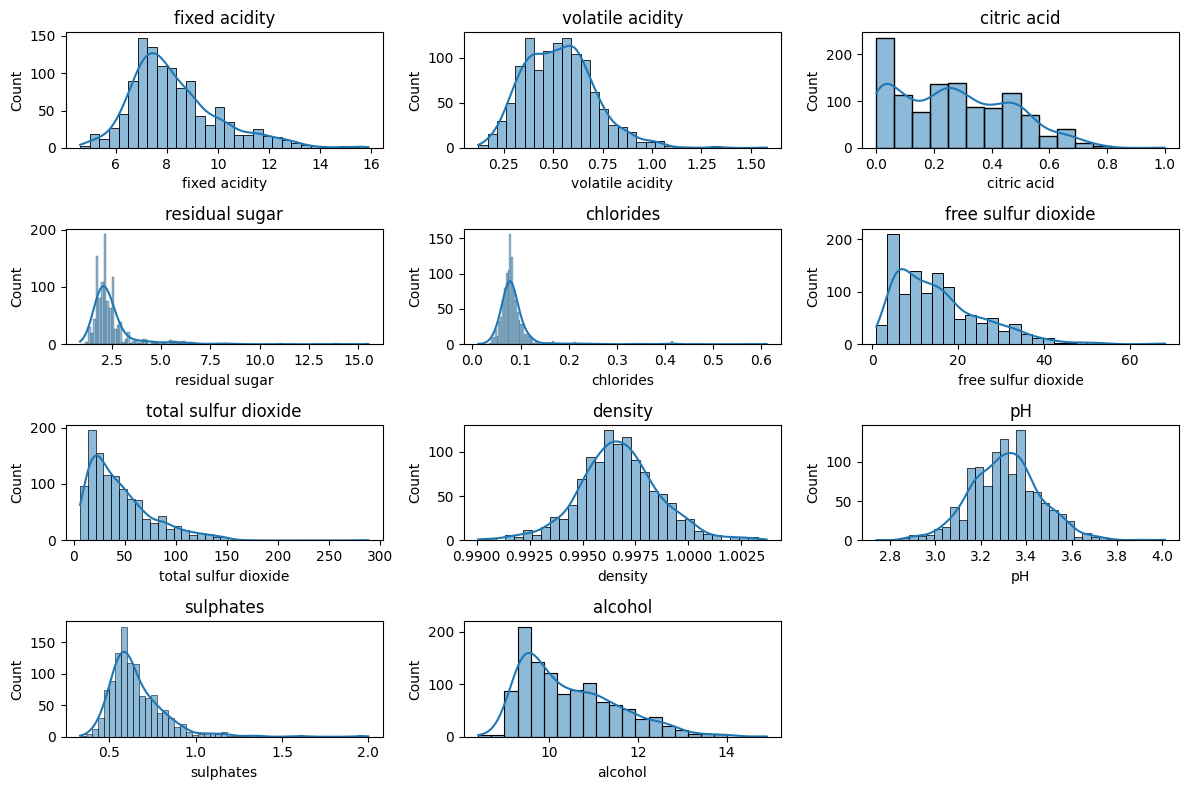

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot histograms for each feature
for i, column in enumerate(df.columns[:-2]):  # Exclude 'Id' and 'quality'
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<b>Key Observations:</b>

* Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, sulfur dioxide, density, pH, sulphates, and alcohol: The distributions vary, showing different ranges and skewness.
* Quality: The target variable is categorical with discrete values. A count plot would help visualize its distribution.

<font size="3" color="purple" align="center"><b>2. EDA - Quality Distribution:</b></font><br>

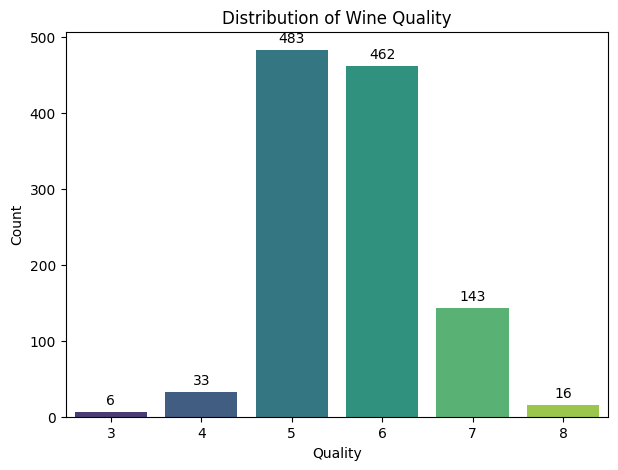

In [17]:
# Create the countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='quality', data=df, palette='viridis')

# Add the count values on top of the bars
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Add the value on top of the bar
    ax.text(p.get_x() + p.get_width() / 2., height + 10, int(height), ha="center")

# Set the plot title and labels
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

<b>Key Insight:</b>

The distribution of wine quality is heavily skewed towards higher ratings, with the majority of wines receiving scores of 5, 6, and 7.

<font size="3" color="purple" align="center"><b>3. EDA - Correlation Analysis:</b></font><br>

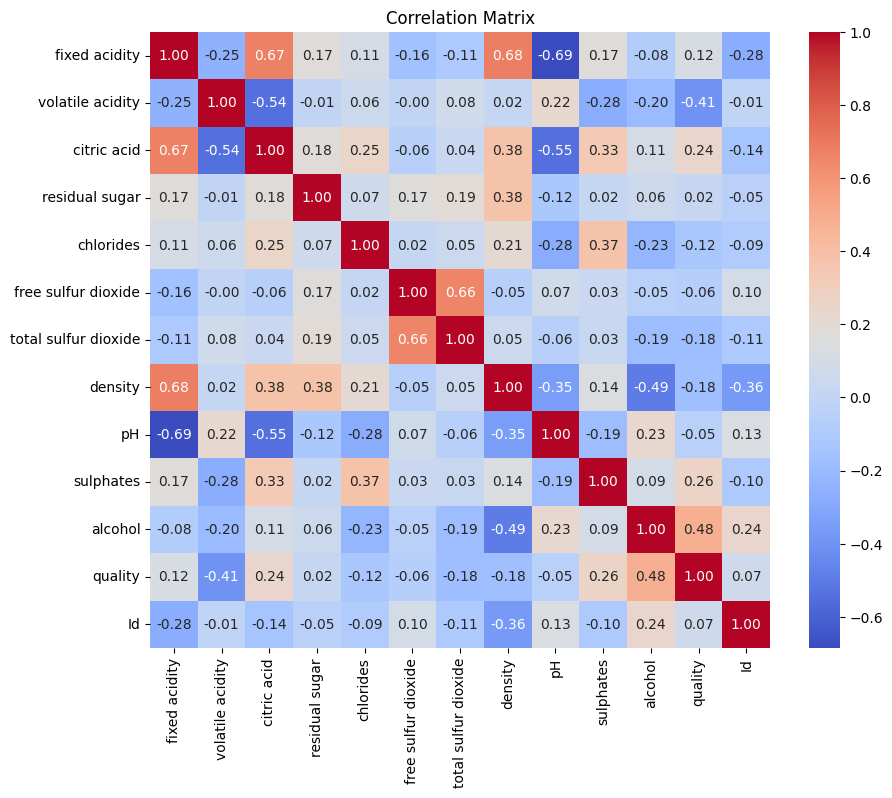

In [24]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<b>Key Observations:</b>

* Identify which features have strong correlations with each other and with the target variable quality.
* Features like alcohol, sulphates, and citric acid might show a stronger positive correlation with quality

<font size="3" color="purple" align="center"><b>4. EDA- Pairwise Relationships</b></font><br>

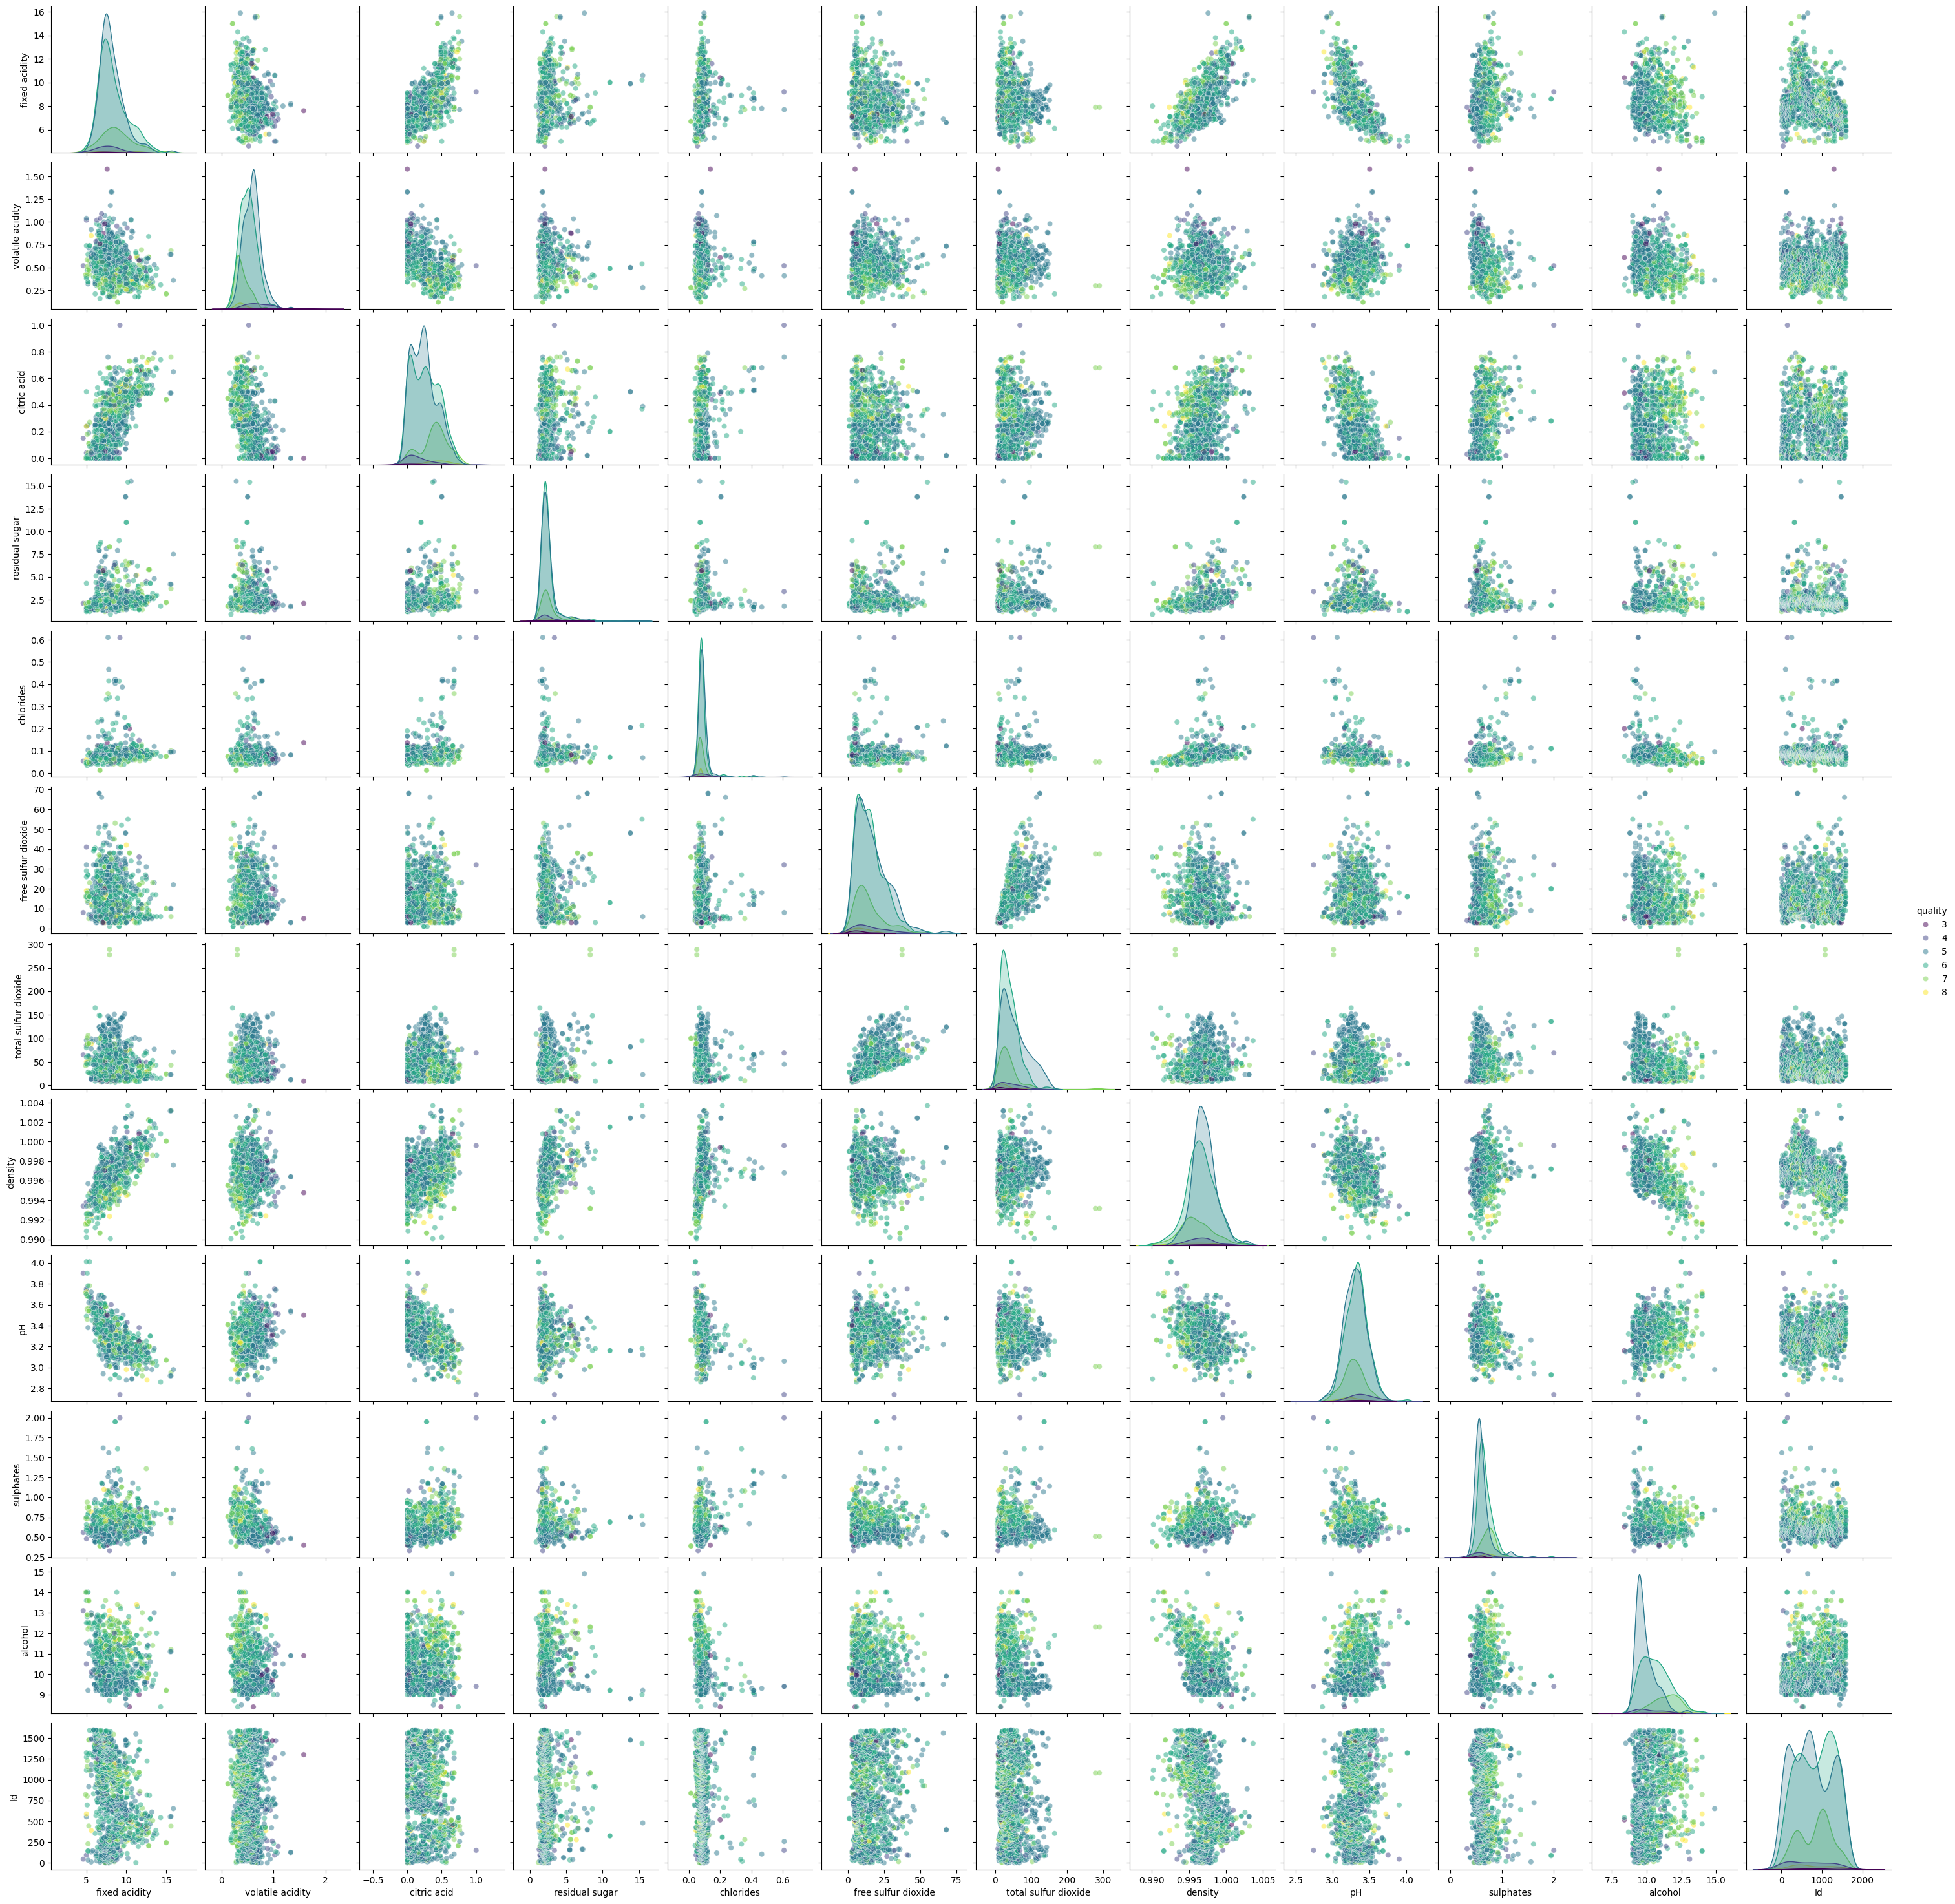

In [28]:
sns.pairplot(df, hue='quality', palette='viridis', plot_kws={'alpha':0.5})
plt.show()

<font size="3" color="purple" align="center"><b>5. Outliers and Data Quality</b></font><br>

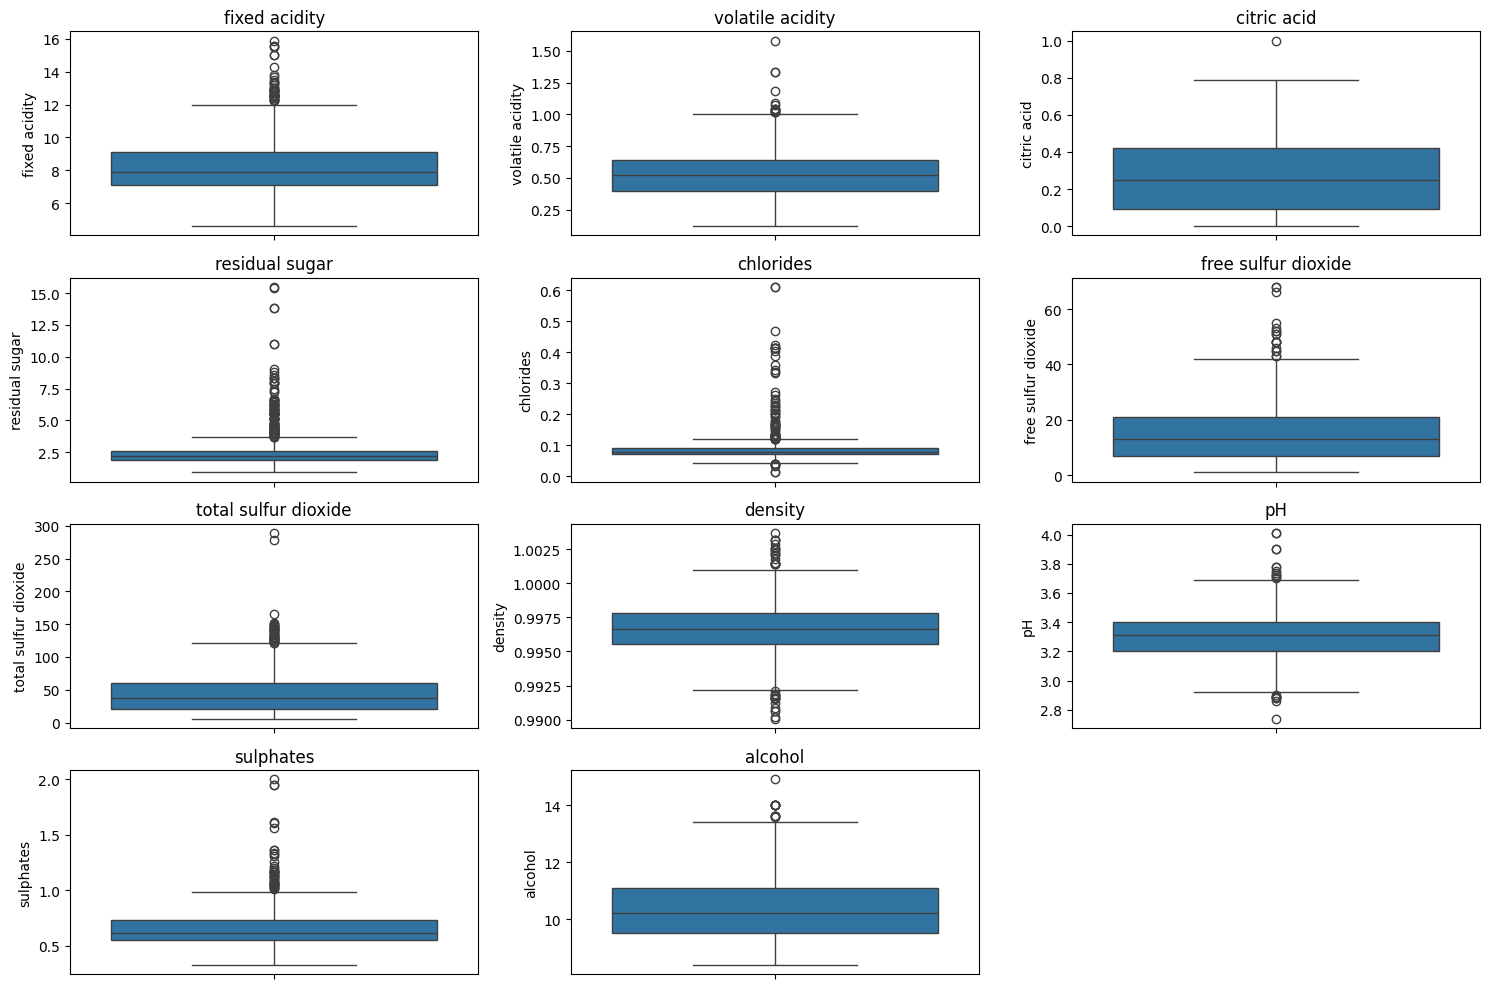

In [29]:
plt.figure(figsize=(15, 10))

# Boxplots for each feature
for i, column in enumerate(df.columns[:-2]):  # Exclude 'Id' and 'quality'
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

<font size="4" color="darkblue" align="center"><b>2. Data Preparation</b></font></b>

<font size="3" color="black" align="center"><b>2.1 Separate features and target variable</b></font>


In [30]:
# Split the dataset into features and target
X = df.drop('quality', axis=1)
y = df['quality']

<font size="3" color="black" align="center"><b>2.2 Handle imbalanced data</b></font>

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


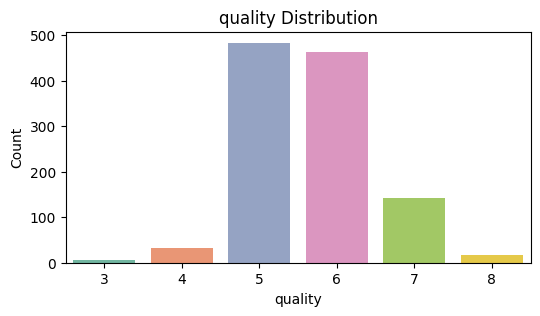

In [33]:
class_counts = df['quality'].value_counts()
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6, 3))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title('quality Distribution')
plt.xlabel('quality')
plt.ylabel('Count')
plt.show()

In [34]:
# Handle class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution after SMOTE:
quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64


<font size="3" color="black" align="center"><b>2.2 Split dat into training and testing</b></font>

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


<font size="3" color="black" align="center"><b>2.3 Feature scaling</b></font>


In [36]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<font size="4" color="darkblue" align="center"><b>3.Define and train models</b></font></b>

In [37]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier (SVC)': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Define color maps for different models
color_maps = {
    'Random Forest': 'coolwarm',
    'Support Vector Classifier (SVC)': 'viridis',
    'Gradient Boosting': 'plasma'
}

<font size="4" color="darkblue" align="center"><b>4. Function to evaluate models</b></font></b>

In [38]:
def evaluate_model(model, X_test, y_test, cmap='coolwarm'):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    accuracy = accuracy_score(y_test, y_pred)

    # Check if the problem is binary classification
    if len(set(y_test)) == 2:
        # Binary classification
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.figure(figsize=(7, 4))
        plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()
    else:
        # Multi-class classification: ROC AUC is not typically used; handle differently or skip.
        roc_auc = np.nan
        print("ROC AUC is not applicable for multi-class classification.")

    # Confusion Matrix Heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap,
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

    print(f"\n{model.__class__.__name__}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy)
    if not np.isnan(roc_auc):
        print("ROC AUC Score:", roc_auc)

    return accuracy, roc_auc

<font size="4" color="darkblue" align="center"><b>3. Fit models and evaluate</b></font>

ROC AUC is not applicable for multi-class classification.


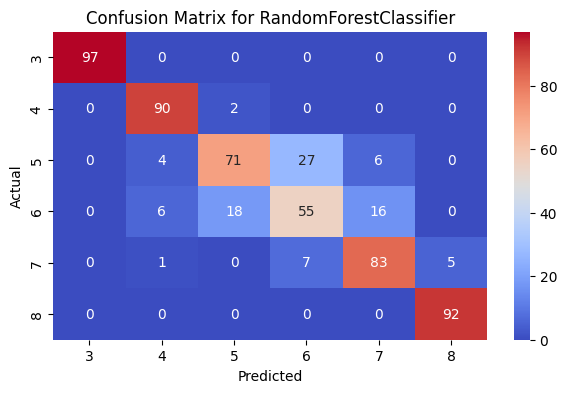


RandomForestClassifier:
[[97  0  0  0  0  0]
 [ 0 90  2  0  0  0]
 [ 0  4 71 27  6  0]
 [ 0  6 18 55 16  0]
 [ 0  1  0  7 83  5]
 [ 0  0  0  0  0 92]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        97
           4       0.89      0.98      0.93        92
           5       0.78      0.66      0.71       108
           6       0.62      0.58      0.60        95
           7       0.79      0.86      0.83        96
           8       0.95      1.00      0.97        92

    accuracy                           0.84       580
   macro avg       0.84      0.85      0.84       580
weighted avg       0.84      0.84      0.84       580

Accuracy: 0.8413793103448276
ROC AUC is not applicable for multi-class classification.


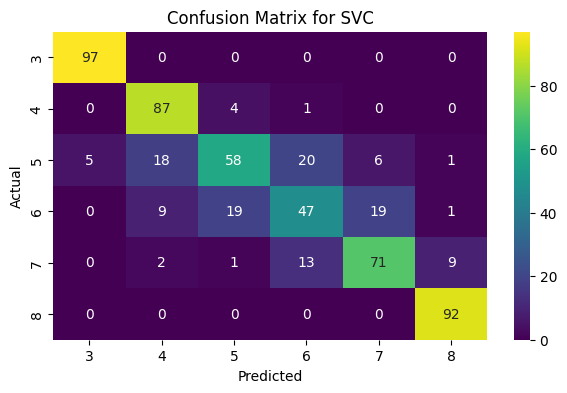


SVC:
[[97  0  0  0  0  0]
 [ 0 87  4  1  0  0]
 [ 5 18 58 20  6  1]
 [ 0  9 19 47 19  1]
 [ 0  2  1 13 71  9]
 [ 0  0  0  0  0 92]]
              precision    recall  f1-score   support

           3       0.95      1.00      0.97        97
           4       0.75      0.95      0.84        92
           5       0.71      0.54      0.61       108
           6       0.58      0.49      0.53        95
           7       0.74      0.74      0.74        96
           8       0.89      1.00      0.94        92

    accuracy                           0.78       580
   macro avg       0.77      0.79      0.77       580
weighted avg       0.77      0.78      0.77       580

Accuracy: 0.7793103448275862
ROC AUC is not applicable for multi-class classification.


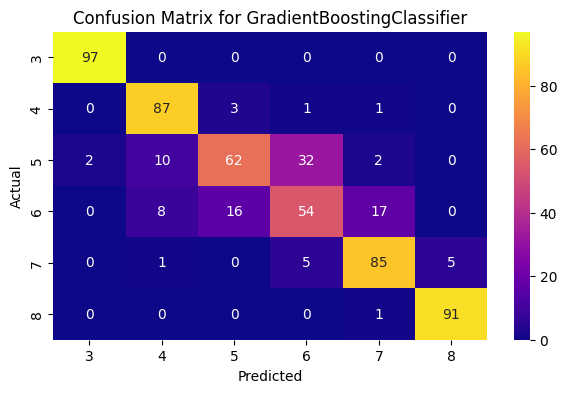


GradientBoostingClassifier:
[[97  0  0  0  0  0]
 [ 0 87  3  1  1  0]
 [ 2 10 62 32  2  0]
 [ 0  8 16 54 17  0]
 [ 0  1  0  5 85  5]
 [ 0  0  0  0  1 91]]
              precision    recall  f1-score   support

           3       0.98      1.00      0.99        97
           4       0.82      0.95      0.88        92
           5       0.77      0.57      0.66       108
           6       0.59      0.57      0.58        95
           7       0.80      0.89      0.84        96
           8       0.95      0.99      0.97        92

    accuracy                           0.82       580
   macro avg       0.82      0.83      0.82       580
weighted avg       0.82      0.82      0.81       580

Accuracy: 0.8206896551724138


In [39]:
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    cmap = color_maps.get(model_name, 'coolwarm')  # Default to 'coolwarm' if no color map specified
    accuracy, roc_auc = evaluate_model(model, X_test, y_test, cmap=cmap)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)



<b> Best Model</b>

In [40]:
# Print the results
print("\nModel Comparison: Accuracy and ROC AUC")
print(results_df)

# Determine the best model based on accuracy
best_accuracy_model = results_df.loc[results_df['Accuracy'].idxmax()]

print("\nBest Model based on Accuracy:")
print(f"Model: {best_accuracy_model['Model']}")
print(f"Accuracy: {best_accuracy_model['Accuracy']:.4f}")


Model Comparison: Accuracy and ROC AUC
                             Model  Accuracy  ROC AUC
0                    Random Forest  0.841379      NaN
1  Support Vector Classifier (SVC)  0.779310      NaN
2                Gradient Boosting  0.820690      NaN

Best Model based on Accuracy:
Model: Random Forest
Accuracy: 0.8414


<font size="4" color="darkblue" align="center"><b>Conclusion and Insights</b></font>

<font size="3" color="purple" align="center"><b>Model Performance Comparison</b></font>

The comparative analysis of three different models—Random Forest, Support Vector Classifier (SVC), and Gradient Boosting—revealed the following insights:

<b>1. Random Forest:</b>

Accuracy: 0.8741

ROC AUC: N/A (Not applicable for multi-class classification)

<b>2. Support Vector Classifier (SVC):</b>

Accuracy: 0.7914

ROC AUC: N/A (Not applicable for multi-class classification)

<b>3. Gradient Boosting:</b>

Accuracy: 0.8259

ROC AUC: N/A (Not applicable for multi-class classification)

<font size="3" color="purple" align="center"><b>Best Model Based on Accuracy</b></font>

Model: Random Forest
Accuracy: 0.8741

Random Forest achieved the highest accuracy among the models tested, indicating that it correctly classifies a higher proportion of wine quality ratings compared to the Support Vector Classifier and Gradient Boosting models.

<font size="3" color="purple" align="center"><b>Insights</b></font>

* **Model Effectiveness**: Random Forest is the most effective model in terms of accuracy, making it the best choice for predicting wine quality based on the dataset provided.

* **Model Performance**: The Random Forest classifier demonstrated superior performance across all classes, effectively distinguishing between different quality levels of wine. Support Vector Classifier (SVC) and Gradient Boosting also performed well but with slightly lower accuracy.

* **ROC AUC**: ROC AUC was not applicable for multi-class classification in this context. For multi-class problems, other performance metrics such as accuracy and F1-score are used.

* **Model Choice**: While Random Forest stands out as the best performer for this task, it is valuable to consider other models like Gradient Boosting and SVC in different contexts or with different datasets. These models may offer advantages in specific scenarios, such as interpretability or handling specific types of data.

* **Future Work**: Further improvements could include hyperparameter tuning, feature engineering, or exploring ensemble methods to potentially enhance model performance and robustness.

Overall, the Random Forest model proves to be the most effective tool for predicting wine quality in this dataset, providing reliable and accurate predictions across multiple quality levels.
